In [2]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpyIW3Gp\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpyIW3Gp\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpyIW3Gp\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpyIW3Gp\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [3]:
ionomics <- read.csv('New_ionStats_X.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [4]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [5]:
# Fit the model
model <- lda(Spec_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$Spec_int)
model

[1] 0.9878049

Call:
lda(Spec_int ~ ., data = train.data)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.03658537 0.01219512 0.12195122 0.04878049 0.02439024 0.14634146 0.02439024 
         8          9 
0.01219512 0.57317073 

Group means:
          B11       Na23       Mg26         Al27        P31        S34
1  0.39389008  0.2208170 -0.9656573 -0.037456674  0.7006302 0.05117618
2  0.43783218  1.8457756 -0.6793465  0.006846828  0.8580099 0.05290044
3  0.12800638  0.7994104 -0.3263909  0.026779521  1.0956113 0.05480008
4  0.38194439  1.7181891 -0.2595581 -0.018952241  0.9879687 0.05230165
5  0.73137230  1.5282700 -0.1880804 -0.012101003  1.4223461 0.05119243
6  0.44563241  0.7081947 -0.7391384 -0.018519482  1.0757576 0.05440924
7  0.46349102  1.0969997 -0.5079941 -0.056669016  1.5628422 0.05261174
8  0.07152919 -0.1250189 -0.8107084  0.032540310  1.3454869 0.05204405
9 -0.34241572 -0.6686841  0.6214751 -0.088495793 -0.8276988 0.04551792

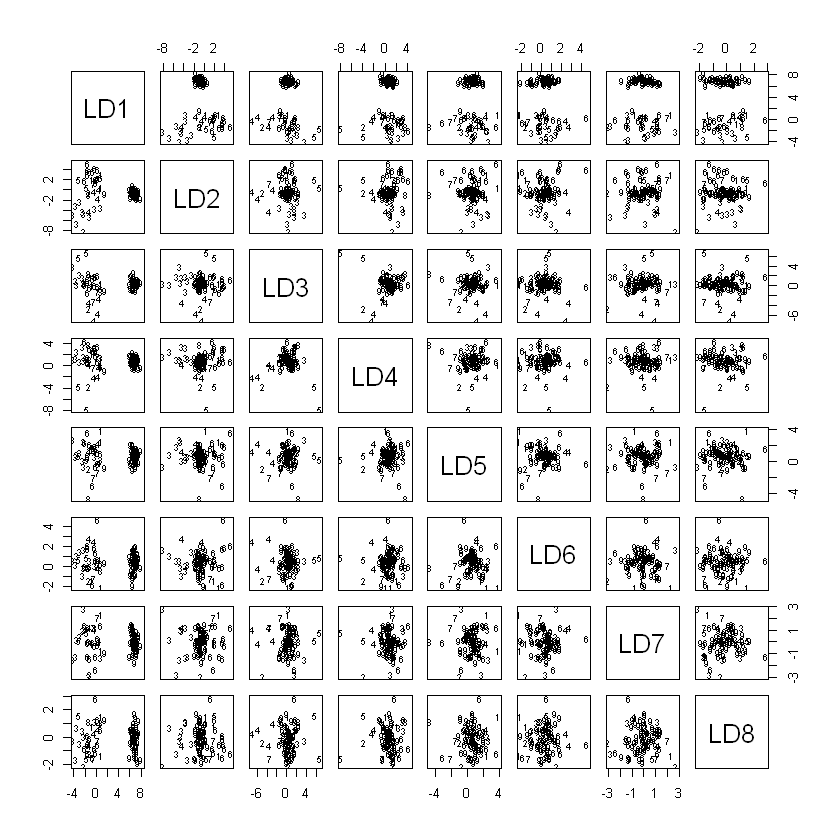

In [6]:
plot(model)

In [7]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 2 3 3
Levels: 1 2 3 4 5 6 7 8 9

,1,2,3,4,5,6,7,8,9
1,9.974539e-01,1.316218e-22,1.571628e-16,1.279974e-14,5.839709e-24,2.536584e-03,9.524234e-06,1.606926e-20,7.726013e-12
2,9.999891e-01,2.067760e-16,1.633558e-10,1.047995e-10,1.441708e-22,1.090134e-05,9.224862e-11,3.080936e-21,2.134702e-10
3,7.536403e-01,6.478178e-18,4.582872e-11,7.793921e-12,3.748414e-25,2.463537e-01,5.955675e-06,1.343760e-13,1.123870e-14
4,5.550328e-18,9.999999e-01,3.008237e-21,1.248636e-07,6.781017e-33,1.871549e-19,5.187027e-12,4.802636e-30,6.337536e-27
5,1.777342e-16,4.630319e-29,1.000000e+00,8.088847e-22,3.981471e-20,4.937011e-17,3.758741e-25,4.890221e-18,5.813297e-30
6,7.786837e-15,4.849319e-21,1.000000e+00,3.463192e-15,2.990616e-26,6.577116e-16,2.609587e-20,1.685595e-17,9.395986e-19


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8
1,-2.602678,3.3680408,0.02975067,0.2658698,1.739812,-2.561321,2.2480723,-1.2814375
2,-2.713180,0.8260115,-0.10277354,-0.6001660,3.128374,-2.499834,-0.7806866,1.5971520
3,-4.300194,2.4568678,-0.40197304,1.3491917,1.045790,-1.894983,-0.1433069,0.8448285


In [8]:
predmodel.test.lda = predict(model, data=test.data)
table <- table(Predicted=predmodel.test.lda$class, Species=test.data$Spec_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         Species
Predicted  1  2  3  4  5  6  7  8  9
        1  3  0  0  0  0  0  0  0  0
        2  0  1  0  0  0  0  0  0  0
        3  0  0 10  0  0  0  0  0  0
        4  0  0  0  4  0  0  0  0  1
        5  0  0  0  0  2  0  0  0  0
        6  0  0  0  0  0 12  0  0  0
        7  0  0  0  0  0  0  2  0  0
        8  0  0  0  0  0  0  0  1  0
        9  0  0  0  0  0  0  0  0 46

Overall Statistics
                                          
               Accuracy : 0.9878          
                 95% CI : (0.9339, 0.9997)
    No Information Rate : 0.5732          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9808          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           1.00000   1.0000    1.000  1.00000  1.00000   1.0000
